In [1]:
import numpy as np
from halotools.sim_manager import DownloadManager, CachedHaloCatalog
#from halotools.empirical_models.abunmatch import conditional_abunmatch
from AbundanceMatching import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


Following the instructions shown in [this webpage](https://halotools.readthedocs.io/en/latest/quickstart_and_tutorials/quickstart_guides/working_with_halotools_provided_catalogs.html)
to download and load a preloaded halotools catalog. Then I'll use [Yao's code](https://bitbucket.org/yymao/abundancematching) to do the abundance matching.

In [4]:
halocat = CachedHaloCatalog(simname = 'bolshoi',halo_finder= 'rockstar', redshift = -0.0003, version_name ='halotools_alpha_version2' )

Loading up a luminosity function. This one is from GAMA Survey, Loveday 2015 (got it from Joe). 

In [5]:
lf = np.genfromtxt('lf_r_sersic_r.dat', skip_header=True)[:,1:3]

In [6]:
af = AbundanceFunction(lf[:,0], lf[:,1], (-27, -5))

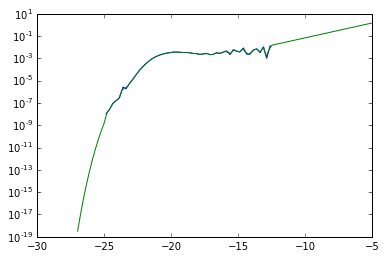

In [12]:
plt.semilogy(lf[:,0], lf[:,1])
x = np.linspace(-27, -5, 101)
plt.semilogy(x, af(x))

In [7]:
scatter = 0.2
remainder = af.deconvolute(scatter*LF_SCATTER_MULT, 20)

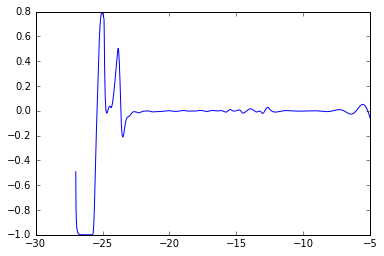

In [14]:
x, nd = af.get_number_density_table()
plt.plot(x, remainder/nd);

In [8]:
halos = np.array(halocat.halo_table)
    
nd_halos = calc_number_densities(halos['halo_vpeak'], halocat.Lbox[0])

In [9]:
catalog = af.match(nd_halos, scatter*LF_SCATTER_MULT)

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([  1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   6.00000000e+00,
          1.00000000e+01,   1.80000000e+01,   2.70000000e+01,
          4.50000000e+01,   7.60000000e+01,   1.23000000e+02,
          1.94000000e+02,   2.90000000e+02,   4.28000000e+02,
          6.21000000e+02,   8.68000000e+02,   1.17700000e+03,
          1.55800000e+03,   2.01700000e+03,   2.48300000e+03,
          2.99600000e+03,   3.52700000e+03,   4.09400000e+03,
          4.61800000e+03,   5.15400000e+03,   5.62500000e+03,
          6.06100000e+03,   6.42000000e+03,   6.80400000e+03,
          7.21200000e+03,   7.42000000e+03,   7.49900000e+03,
          7.40800000e+03,   7.23800000e+03,   7.04600000e+03,
          6.88800000e+03,   6.91600000e+03,   6.89200000e+03,
          6.66300000e+03,   6.34300000e+03,   5.87500000e+03,
          5.61700000e+03,   5.53700000e+03,   5.17100000e+03,
          4.68200000e+03,   4.77300000e+03,   5.07600000e+03,
        

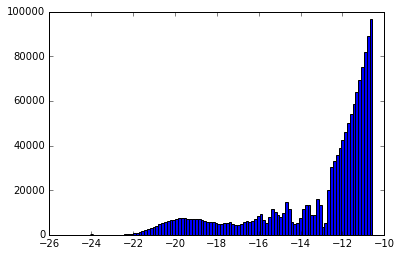

In [11]:
plt.hist(catalog, bins = 100)

In [ ]:
#np.savetxt('sham_catalog.npy', catalog)